# 6. Проверка на нормальность #


In [4]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns

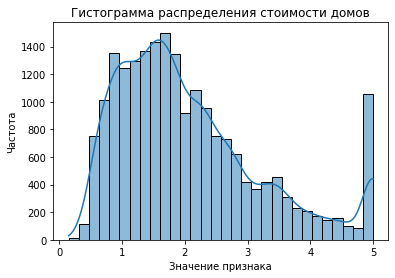

In [7]:
dataset = datasets.fetch_california_housing()
data = dataset.target

ax = sns.histplot(data, bins=30, kde=True)
ax.set(xlabel='Значение признака', ylabel='Частота')
plt.title('Гистограмма распределения стоимости домов')
plt.show()